In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [2]:
datos = pd.read_csv('dataset.csv', sep=",")
datos.head()


,Horas de estudio,Horas de sueno,Categoria
0,4.855064,9.639962,1
1,8.625440,0.058927,0
2,3.828192,0.723199,0
3,7.150955,3.899420,1
4,6.477900,8.198181,1


In [3]:
X = datos.values[:,0:2]
Y = datos.values[:,2]

X[:5]

array([[4.85506424, 9.63996157],
       [8.62543976, 0.05892653],
       [3.82819154, 0.72319923],
       [7.15095484, 3.89942042],
       [6.47790044, 8.19818055]])

In [4]:
Y[:5]

array([1., 0., 0., 1., 1.])

In [5]:
# Graficar
idx0 = np.where(Y==0)
idx1 = np.where(Y==1)

In [6]:
idx0

(array([ 1,  2,  5,  9, 12, 14, 19, 23, 24, 25, 28, 31, 34, 37, 39, 40, 44,
        45, 46, 50, 52, 54, 55, 57, 59, 62, 64, 66, 67, 70, 72, 73, 75, 76,
        77, 78, 82, 83, 85, 87, 89, 90, 95, 97, 99]),)

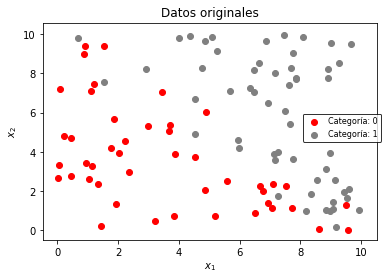

In [7]:
plt.scatter(X[idx0,0],X[idx0,1],color='red',label='Categoría: 0')
plt.scatter(X[idx1,0],X[idx1,1],color='gray',label='Categoría: 1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(bbox_to_anchor=(0.765,0.6),fontsize=8,edgecolor='black')
plt.title('Datos originales')
plt.show()

In [8]:
np.random.seed(1)       # para reproducibilidad
input_dim = X.shape[1]
output_dim = 1                          

modelo = Sequential()
modelo.add(
    Dense(
        output_dim, 
        input_dim=input_dim, 
        activation='sigmoid'
    )
)

In [9]:
sgd = SGD(lr=0.2)
modelo.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [10]:
num_epochs = 1000
batch_size = X.shape[0]
historia = modelo.fit(X, Y, epochs=num_epochs, batch_size=batch_size, verbose=2)

Epoch 1/1000
 - 1s - loss: 1.6218 - accuracy: 0.5500
Epoch 2/1000
 - 0s - loss: 0.8624 - accuracy: 0.6500
Epoch 3/1000
 - 0s - loss: 0.7232 - accuracy: 0.6500
Epoch 4/1000
 - 0s - loss: 0.6827 - accuracy: 0.6500
Epoch 5/1000
 - 0s - loss: 0.6594 - accuracy: 0.6500
Epoch 6/1000
 - 0s - loss: 0.6948 - accuracy: 0.5500
Epoch 7/1000
 - 0s - loss: 0.6823 - accuracy: 0.5000
Epoch 8/1000
 - 0s - loss: 0.7886 - accuracy: 0.5500
Epoch 9/1000
 - 0s - loss: 0.6782 - accuracy: 0.5300
Epoch 10/1000
 - 0s - loss: 0.7928 - accuracy: 0.5500
Epoch 11/1000
 - 0s - loss: 0.6694 - accuracy: 0.5400
Epoch 12/1000
 - 0s - loss: 0.7814 - accuracy: 0.5500
Epoch 13/1000
 - 0s - loss: 0.6640 - accuracy: 0.5700
Epoch 14/1000
 - 0s - loss: 0.7753 - accuracy: 0.5500
Epoch 15/1000
 - 0s - loss: 0.6573 - accuracy: 0.5900
Epoch 16/1000
 - 0s - loss: 0.7660 - accuracy: 0.5500
Epoch 17/1000
 - 0s - loss: 0.6514 - accuracy: 0.6000
Epoch 18/1000
 - 0s - loss: 0.7581 - accuracy: 0.5500
Epoch 19/1000
 - 0s - loss: 0.6453 - 

In [14]:
historia.history.keys()

dict_keys(['loss', 'accuracy'])

Text(0.5, 1.0, 'Comportamiento de la precisión')

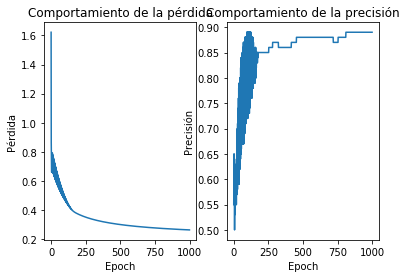

In [15]:
# Graficar comportamiento de la pérdida y de la precisión
plt.subplot(1,2,1)
plt.plot(historia.history['loss'])
plt.ylabel('Pérdida')
plt.xlabel('Epoch')
plt.title('Comportamiento de la pérdida')

plt.subplot(1,2,2)
plt.plot(historia.history['accuracy'])
plt.ylabel('Precisión')
plt.xlabel('Epoch')
plt.title('Comportamiento de la precisión')


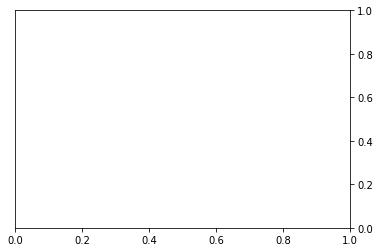

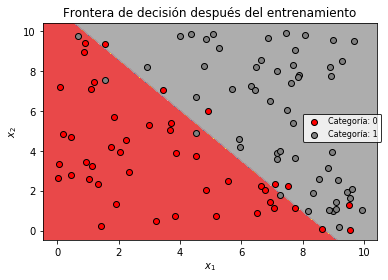

In [18]:
ax = plt.gca()
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()

#plt.show()

def dibujar_frontera(X,Y,modelo,titulo):
    # Valor mínimo y máximo y rellenado con ceros
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01

    # Grilla de puntos
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predecir categorías para cada punto en la gruilla
    Z = modelo.predict_classes(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Set1, alpha=0.8)

    idx0 = np.where(Y==0)
    idx1 = np.where(Y==1)
    plt.scatter(X[idx0,0],X[idx0,1],color='red', edgecolor='k', label='Categoría: 0')
    plt.scatter(X[idx1,0],X[idx1,1],color='gray',edgecolor='k', label='Categoría: 1')
    plt.legend(bbox_to_anchor=(0.765,0.6),fontsize=8,edgecolor='black')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(titulo)

    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.show()

dibujar_frontera(X,Y,modelo,'Frontera de decisión después del entrenamiento')